<a href="https://colab.research.google.com/github/joowop/Metaverse_AI_Project/blob/main/prohet_%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
!pip install statsmodels==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 68.4 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [3]:
!pip install yfinance

In [4]:
import yfinance as yf
from pandas_datareader import data
import pandas as pd

In [23]:
yf.pdr_override()

sam_data = data.get_data_yahoo('002700.KS', '2020-1-1', '2023-9-13')
sam_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1860.0,1865.0,1835.0,1855.0,1803.136963,745063
2020-01-03,1850.0,1860.0,1815.0,1835.0,1783.696045,1329726
2020-01-06,1805.0,1820.0,1750.0,1815.0,1764.255249,2314928
2020-01-07,1825.0,1835.0,1800.0,1810.0,1759.395020,872997
2020-01-08,1790.0,1805.0,1705.0,1745.0,1696.212280,3057079
...,...,...,...,...,...,...
2023-09-06,1744.0,1747.0,1733.0,1746.0,1746.000000,259759
2023-09-07,1746.0,1746.0,1733.0,1736.0,1736.000000,373603
2023-09-08,1733.0,1799.0,1733.0,1773.0,1773.000000,531306


In [24]:
df = pd.DataFrame({'ds': sam_data.index , 'y': sam_data['Close']})
df.reset_index(inplace=True)
del df['Date']
df

,ds,y
0,2020-01-02,1855.0
1,2020-01-03,1835.0
2,2020-01-06,1815.0
3,2020-01-07,1810.0
4,2020-01-08,1745.0
...,...,...
909,2023-09-06,1746.0
910,2023-09-07,1736.0
911,2023-09-08,1773.0
912,2023-09-11,1774.0


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [26]:
sam_predict = Prophet(yearly_seasonality=True, daily_seasonality=True)
sam_predict.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd75kwm33/x_23xji3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd75kwm33/zzfjjml0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32926', 'data', 'file=/tmp/tmpd75kwm33/x_23xji3.json', 'init=/tmp/tmpd75kwm33/zzfjjml0.json', 'output', 'file=/tmp/tmpd75kwm33/prophet_model4knj2nqn/prophet_model-20230914013126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
result = sam_predict.make_future_dataframe(periods=365)
forecast = sam_predict.predict(result)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1274,2024-09-07,1422.891021,1251.554883,1587.510086
1275,2024-09-08,1420.986522,1240.951374,1600.660828
1276,2024-09-09,1405.390324,1205.859445,1564.625187
1277,2024-09-10,1402.888413,1214.226577,1587.702054
1278,2024-09-11,1400.429447,1219.464609,1581.526699


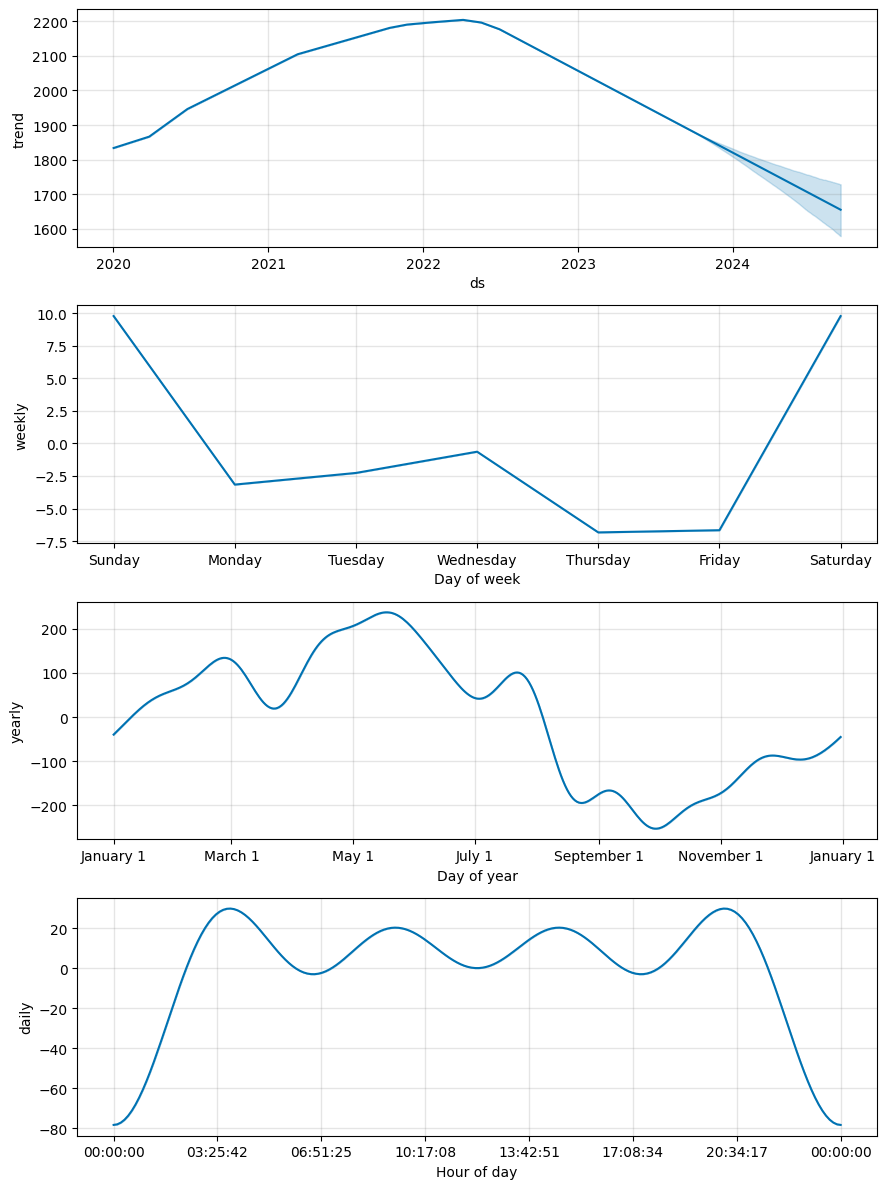

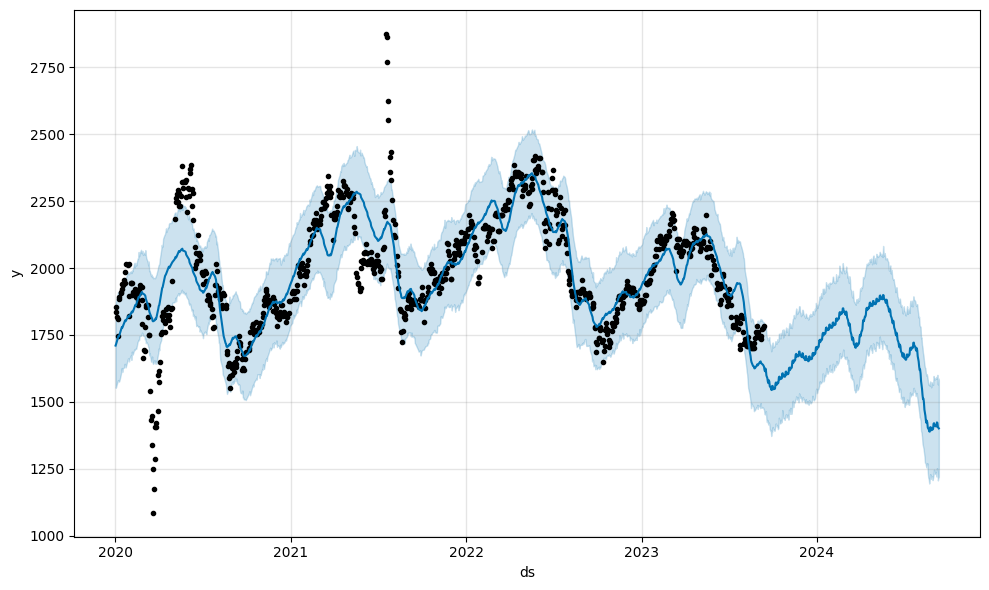

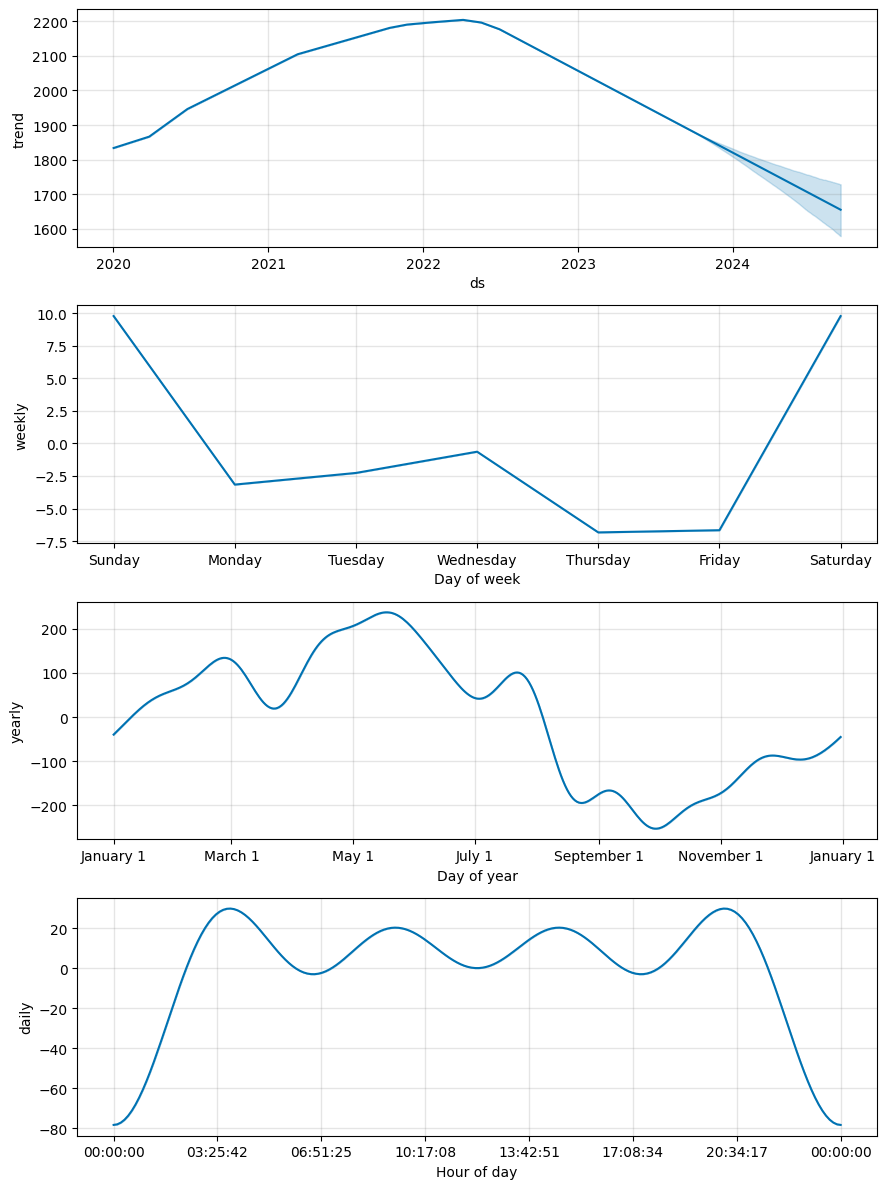

In [28]:
sam_predict.plot(forecast)
sam_predict.plot_components(forecast)